# Cel projektu
Celem projektu jest predykcja jakości wina na podstawie cech fizykochemicznych
oraz porównanie skuteczności różnych modeli regresyjnych.


In [592]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [593]:
df = pd.read_csv('../data/wine_cleared.csv')

In [594]:
results = pd.DataFrame(columns=["Model", "MAE", "RMSE", "R2"])


#### Drop tables

In [595]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [596]:
corr = df.corr()["quality"]
print(abs(corr).sort_values(ascending=False))

quality                 1.000000
alcohol                 0.492461
sulphates               0.389070
volatile acidity        0.354023
citric acid             0.246467
total sulfur dioxide    0.225417
density                 0.165517
fixed acidity           0.149053
chlorides               0.109996
pH                      0.092581
free sulfur dioxide     0.052188
residual sugar          0.051648
Name: quality, dtype: float64


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1424 non-null   float64
 1   volatile acidity      1424 non-null   float64
 2   citric acid           1424 non-null   float64
 3   residual sugar        1424 non-null   float64
 4   chlorides             1424 non-null   float64
 5   free sulfur dioxide   1424 non-null   float64
 6   total sulfur dioxide  1424 non-null   float64
 7   density               1424 non-null   float64
 8   pH                    1424 non-null   float64
 9   sulphates             1424 non-null   float64
 10  alcohol               1424 non-null   float64
 11  quality               1424 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 133.6 KB


In [598]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,8.308146,0.522897,0.264115,2.385990,0.081270,14.952949,42.658708,0.996709,3.316721,0.640864,10.422776,5.659410
std,1.644533,0.168882,0.191162,0.859421,0.020358,9.167369,27.831363,0.001697,0.140946,0.126790,1.009241,0.778223
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,35.000000,0.996700,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,57.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.222000,45.000000,135.000000,1.002100,3.750000,1.110000,13.500000,8.000000


<Axes: >

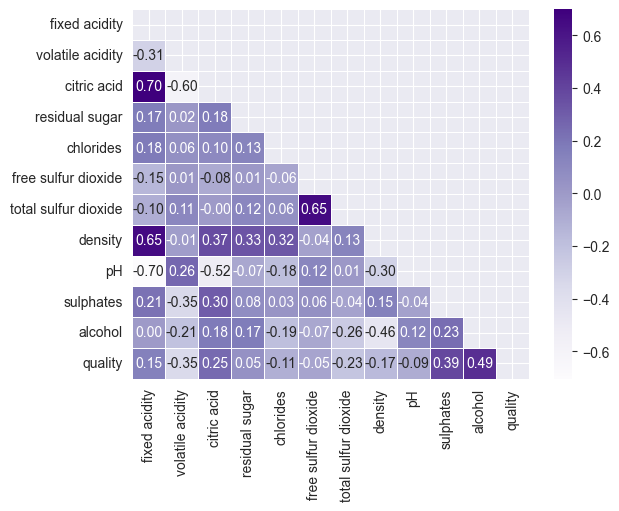

In [599]:
sn.heatmap(data= df.corr(), cmap="Purples",annot=True, fmt=".2f",linewidths=0.5,mask=np.triu(df.corr()))

### Korelacje
- Najsilniejsza korelacja quality -> alcohol kolejno, siarczany
- Alkohol ma mocną korelacje z gestoscia co ma logiczny sens
- Stala kwasowosc ma wyskoa korelacje z kwasem cyrynowym, ma ujema wysoka korelacje ze skala pH

In [600]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [601]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='fixed_acidity', ylabel='pH'>

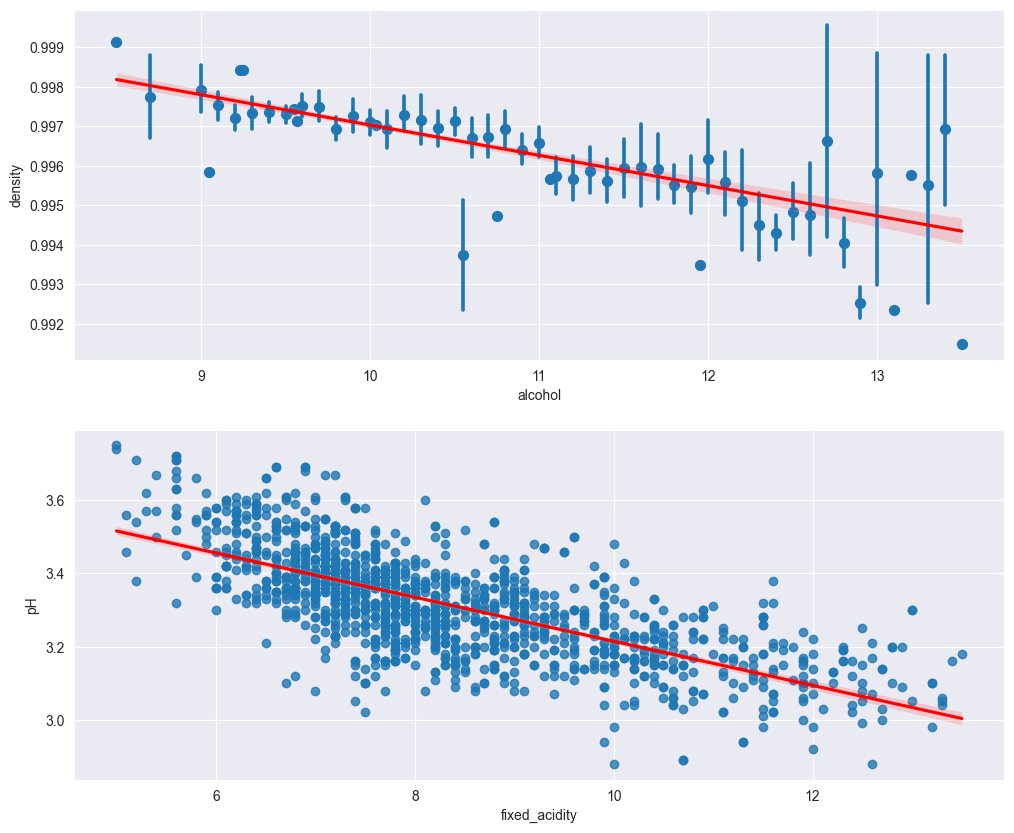

In [602]:
fig, axes = plt.subplots(2,1, figsize=(12,10))
axes = axes.flatten()
sn.regplot(data=df, x="alcohol", y="density", x_estimator=np.mean, ax=axes[0],line_kws=dict(color="r"))
sn.regplot(data=df, x="fixed_acidity", y="pH", ax=axes[1], line_kws=dict(color="r"))

## Podzial danych
Dane zostana podzielone w proporcjach 7:2:1 na zbiory treningowy, walidacyjny, testowy

In [603]:
from sklearn.model_selection import train_test_split

y = df.quality
X = df.drop(columns='quality')

#zbior testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(X_train.count())
print(X_test.count())

fixed_acidity           996
volatile_acidity        996
citric_acid             996
residual_sugar          996
chlorides               996
free_sulfur_dioxide     996
total_sulfur_dioxide    996
density                 996
pH                      996
sulphates               996
alcohol                 996
dtype: int64
fixed_acidity           428
volatile_acidity        428
citric_acid             428
residual_sugar          428
chlorides               428
free_sulfur_dioxide     428
total_sulfur_dioxide    428
density                 428
pH                      428
sulphates               428
alcohol                 428
dtype: int64


### Standaryzacja

In [604]:
from sklearn.preprocessing import StandardScaler

In [605]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # nauka i skalowanie
X_test_scaled = scaler.transform(X_test) # transformacje zbioru testowego

## Regresja linniowa

In [606]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [607]:
model = linear_model.LinearRegression()

In [608]:
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [609]:
y_pred = model.predict(X_test_scaled)

In [610]:
coefficients = {name: round(float(value), 4) for name, value in zip(X.columns, model.coef_)}
print(coefficients)
print("\n",sorted(coefficients.values()),"\n")

mae = np.round(mean_absolute_error(y_test, y_pred),2)
rsme = np.round(mean_squared_error(y_test, y_pred),2)
r2 = np.round(r2_score(y_test, y_pred),2)
print('Mean square error: ', rsme)
print("MAE: ", mae)
print("R^2 score: " ,r2)
results.loc[len(results)] = ["Linear Regression", mae,rsme,r2]

{'fixed_acidity': 0.002, 'volatile_acidity': -0.135, 'citric_acid': -0.0483, 'residual_sugar': -0.0182, 'chlorides': -0.0375, 'free_sulfur_dioxide': 0.0395, 'total_sulfur_dioxide': -0.0901, 'density': 0.0079, 'pH': -0.0892, 'sulphates': 0.192, 'alcohol': 0.3003}

 [-0.135, -0.0901, -0.0892, -0.0483, -0.0375, -0.0182, 0.002, 0.0079, 0.0395, 0.192, 0.3003] 

Mean square error:  0.4
MAE:  0.5
R^2 score:  0.37


### Pozbycie sie malo istotnych cech

In [611]:
y = df.quality
X_slim = df.drop(columns=['quality', 'density', 'fixed_acidity', 'residual_sugar', 'citric_acid', ])

#zbior testowy
X_train_reg_slim, X_test_reg_slim, y_train_reg_slim, y_test_reg_slim = train_test_split(X_slim, y, test_size=0.3, random_state=42)
#skalowanie
X_train_scaled_slim = scaler.fit_transform(X_train_reg_slim)
X_test_reg_slim = scaler.transform(X_test_reg_slim)

#modelowanie
model.fit(X_train_scaled_slim, y_train_reg_slim)
# predykcja
y_pred_reg_slim = model.predict(X_test_reg_slim)
# wyniki
coefficients_slim = {name: round(float(value), 4) for name, value in zip(X_slim.columns, model.coef_)}
print(coefficients_slim)
print("\n",sorted(coefficients_slim.values()),"\n")

print("Intercept: %.2f" % model.intercept_)
print('Mean square error: %.2f' % mean_squared_error(y_test_reg_slim, y_pred_reg_slim))
print("MAE: %.2f" % mean_absolute_error(y_test_reg_slim, y_pred_reg_slim))
print("R^2 score %.3f" % r2_score(y_test_reg_slim, y_pred_reg_slim))



{'volatile_acidity': -0.1156, 'chlorides': -0.0405, 'free_sulfur_dioxide': 0.047, 'total_sulfur_dioxide': -0.1036, 'pH': -0.0718, 'sulphates': 0.1872, 'alcohol': 0.2847}

 [-0.1156, -0.1036, -0.0718, -0.0405, 0.047, 0.1872, 0.2847] 

Intercept: 5.66
Mean square error: 0.40
MAE: 0.50
R^2 score 0.370


#### Wykres

Text(0.5, 1.0, 'Rozklad predykcji wzgledem rzeczywistych ocen (Regresja linniowa)')

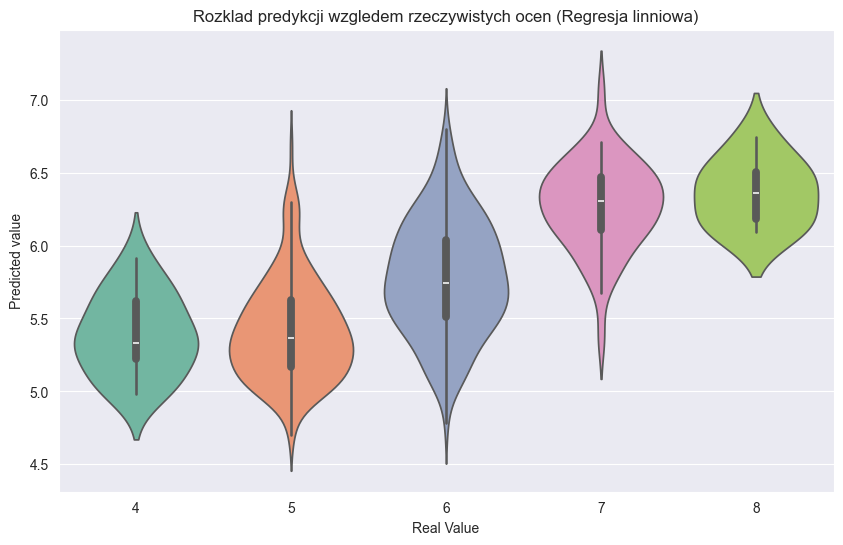

In [612]:
regression_pd = pd.DataFrame({
    "Real Value": y_test_reg_slim,
    "Predicted value": y_pred
})
plt.figure(figsize=(10,6))
sn.violinplot(x="Real Value", y="Predicted value", data=regression_pd, hue="Real Value", palette="Set2", legend=False)
plt.title("Rozklad predykcji wzgledem rzeczywistych ocen (Regresja linniowa)")

Text(0.5, 0, 'Błąd')

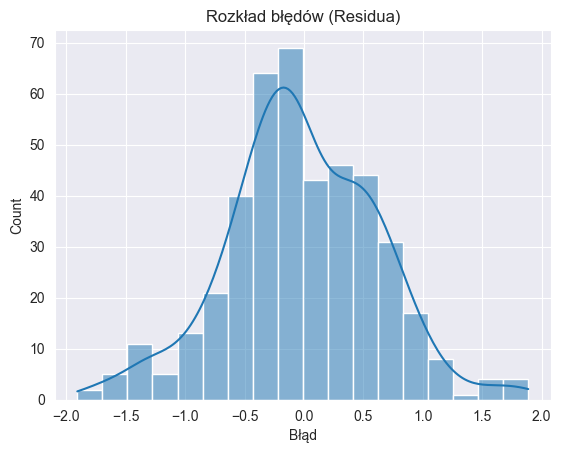

In [613]:
residuals = y_test_reg_slim - y_pred_reg_slim
sn.histplot(residuals, kde=True)
plt.title('Rozkład błędów (Residua)')
plt.xlabel('Błąd')

<Axes: ylabel='quality'>

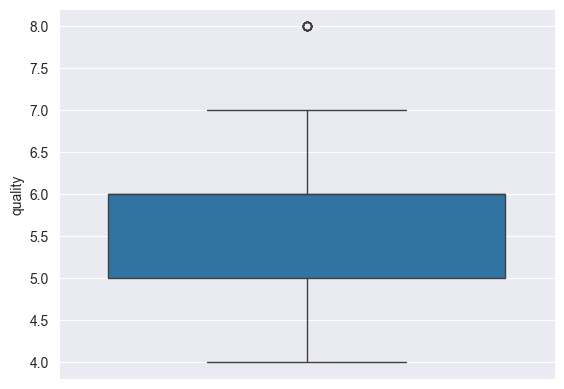

In [614]:
sn.boxplot(y_test_reg_slim)

<Axes: >

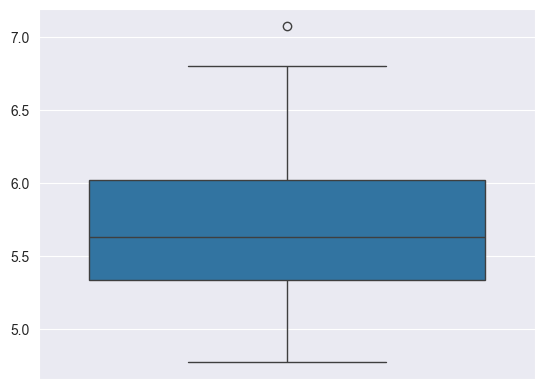

In [615]:
sn.boxplot(y_pred_reg_slim)

### Regresja linniowa dla podanych danych nie jest idealna

- Najwiekszy wplyw na jakosc wina ma alkohol
- Regresja linniowa wyjasnia okolo 37% podanych wnyikow
- MAE wynosi 0.5 co przeklada sie na blad około 12.5%

## KNN REGRESSION

In [616]:
from sklearn.neighbors import KNeighborsRegressor
n = 1

min_mae = 10
min_rmse = 10
max_r2 = -10000
mae_score = {}
for n in range(1,150):
    model = KNeighborsRegressor(n_neighbors=n)

    model.fit(X_train_scaled_slim, y_train_reg_slim)
    y_pred = model.predict(X_test_reg_slim)
    mae = np.round(mean_absolute_error(y_test_reg_slim, y_pred),2)
    rmse = np.sqrt(mean_squared_error(y_test_reg_slim, y_pred)).round(2)
    r2 = np.round(r2_score(y_test_reg_slim, y_pred),2)
    mae_score[n] = mae
    if mae < min_mae:
        min_mae = mae
        # print(mae)
    if rmse < min_rmse:
        min_rmse = rmse
        # print(rmse)
    if r2 > max_r2:
        max_r2 = r2
        # print(r2)



print("MAE:", min_mae)
print("RMSE:", min_rmse)
print("R2:", max_r2)
results.loc[len(results)] = ["KNN", min_mae,min_rmse,max_r2]


MAE: 0.45
RMSE: 0.63
R2: 0.39


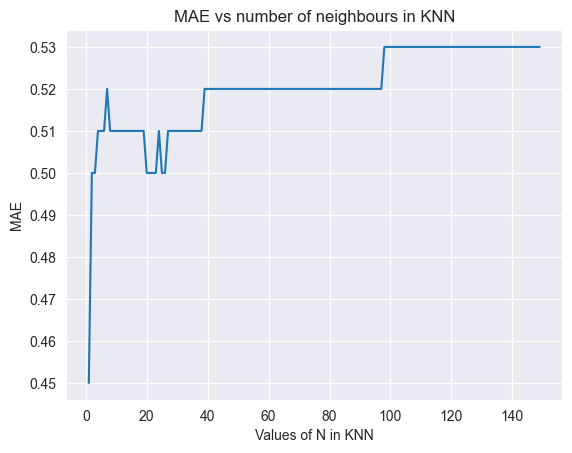

In [617]:
n_values = list(mae_score.keys())
mae_values = list(mae_score.values())
plt.plot(n_values, mae_values)
plt.xlabel("Values of N in KNN")
plt.ylabel("MAE")
plt.title("MAE vs number of neighbours in KNN")
plt.show()


Text(0.5, 1.0, 'Rozklad predykcji wzgledem rzeczywistych ocen (KNN)')

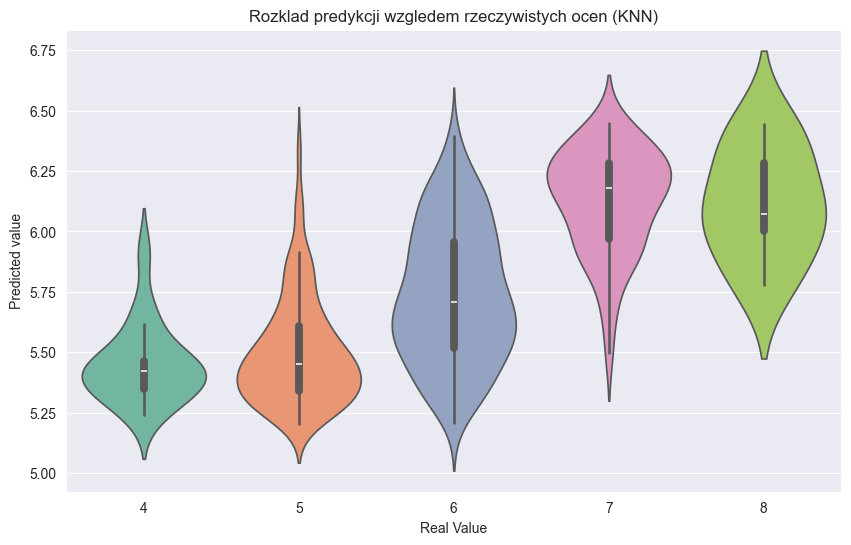

In [618]:
knn_result_df = pd.DataFrame({
    "Real Value": y_test_reg_slim,
    "Predicted value": y_pred
})
plt.figure(figsize=(10,6))
sn.violinplot(x="Real Value", y="Predicted value", data=knn_result_df, hue="Real Value", palette="Set2", legend=False)
plt.title("Rozklad predykcji wzgledem rzeczywistych ocen (KNN)")

#### KNN
- Uzyskał lepsze dane od regresji linniowej z wynikiem MAE 0,45 co przeklada sie na bląd 11,25%


## Drzewa decyzyjne

In [619]:
from sklearn.tree import DecisionTreeRegressor

In [620]:

def tree(X_train, X_test, y_train, y_test):
    n = 1
    min_mae = 10
    min_rmse = 10
    max_r2 = -10000
    mae_score = {}
    best_depth_mae = 0
    for n in range(1,15):
        model = DecisionTreeRegressor(max_depth=n)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = np.round(mean_absolute_error(y_test, y_pred),2)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
        r2 = np.round(r2_score(y_test, y_pred),2)
        mae_score[n] = mae
        if mae < min_mae:
            min_mae = mae
            best_depth_mae = n
        if rmse < min_rmse:
            min_rmse = rmse
        if r2 > max_r2:
            max_r2 = r2
    return min_mae, min_rmse, max_r2, mae_score, best_depth_mae

In [621]:
min_mae, min_rmse, max_r2, mae_score, best_depth_mae = tree(X_train_scaled_slim, X_test_reg_slim,y_train_reg_slim, y_test_reg_slim)

In [622]:
print("MAE:", min_mae, "Depth: ", best_depth_mae )
print("RMSE:", min_rmse)
print("R2:", max_r2, "")
results.loc[len(results)] = ["Decision Tree", min_mae,min_rmse,max_r2]


MAE: 0.47 Depth:  11
RMSE: 0.66
R2: 0.31 


Text(0.5, 1.0, 'MAE vs depth of tree')

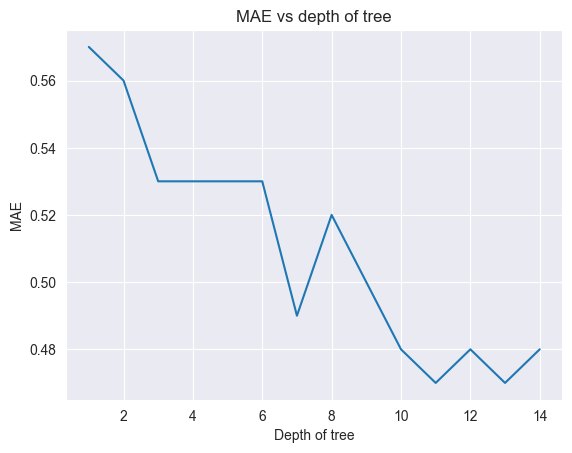

In [623]:
leaf_tree = list(mae_score.values())
n = list(mae_score.keys())

plt.plot(n, leaf_tree)
plt.ylabel("MAE")
plt.xlabel("Depth of tree")
plt.title("MAE vs depth of tree")


Text(0.5, 1.0, 'Rozklad predykcji wzgledem rzeczywistych ocen (DT)')

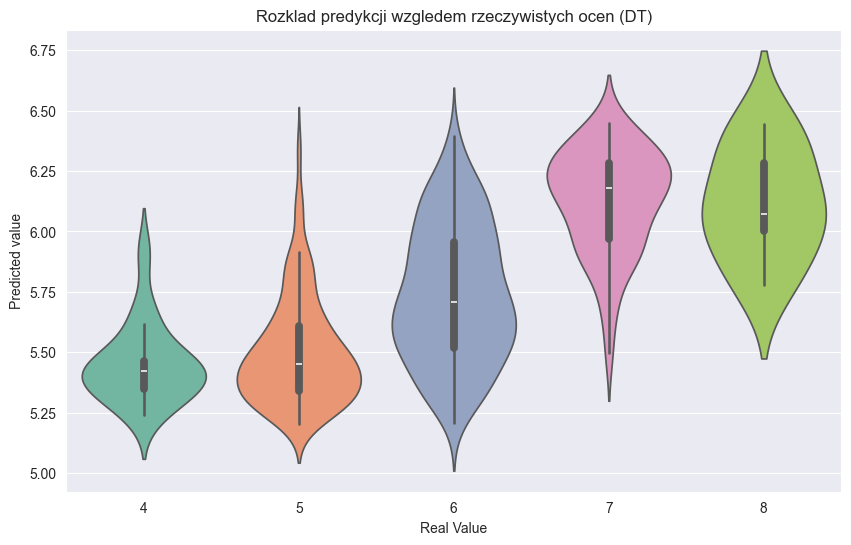

In [624]:
tree_df = pd.DataFrame({
    "Real Value": y_test_reg_slim,
    "Predicted value": y_pred
})
plt.figure(figsize=(10,6))
sn.violinplot(x="Real Value", y="Predicted value", data=tree_df, hue="Real Value", palette="Set2", legend=False)
plt.title("Rozklad predykcji wzgledem rzeczywistych ocen (DT)")

### Drzewa z pelnym zakresem danych

In [625]:
# print(X_train.count())
# print(X_test.count())
min_mae, min_rmse, max_r2, mae_score, best_depth_mae = tree(X_train, X_test,y_train, y_test)

MAE: 0.44 Depth:  14
RMSE: 0.65
R2: 0.35 


Text(0.5, 1.0, 'MAE vs depth of tree')

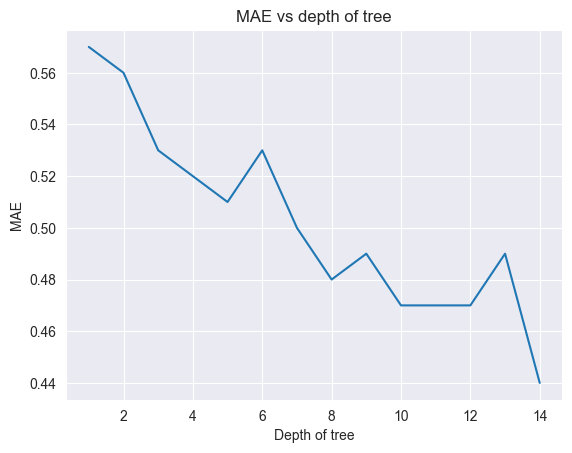

In [626]:
print("MAE:", min_mae, "Depth: ", best_depth_mae )
print("RMSE:", min_rmse)
print("R2:", max_r2, "")

results.loc[len(results)] = ["Decision tree - full set", mae,rsme,r2]


leaf_tree = list(mae_score.values())
n = list(mae_score.keys())

plt.plot(n, leaf_tree)
plt.ylabel("MAE")
plt.xlabel("Depth of tree")
plt.title("MAE vs depth of tree")


#### Porownanie danych pelnych z selekcja

Text(0.5, 1.0, 'Dane bez szumu')

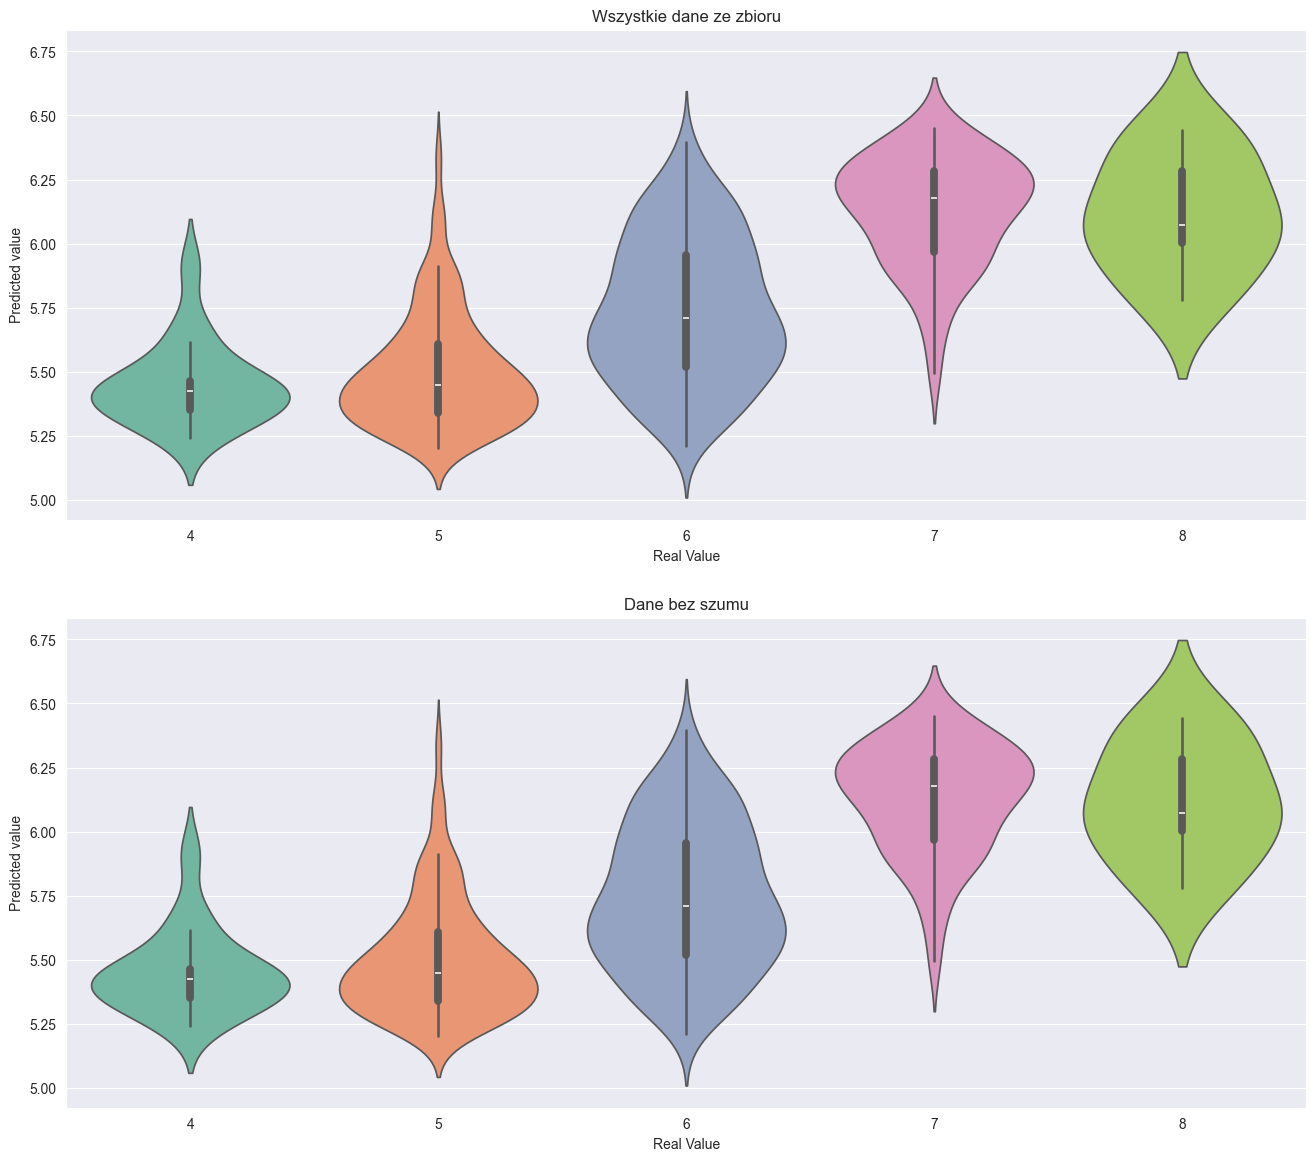

In [627]:
tree_df_full_data = pd.DataFrame({
    "Real Value": y_test,
    "Predicted value": y_pred
})
fig, axes = plt.subplots(2,1, figsize=(16,14))
axes = axes.flatten()
# plt.figure(figsize=(10,6))

sn.violinplot(x="Real Value", y="Predicted value", data=tree_df_full_data, hue="Real Value", palette="Set2", legend=False, ax=axes[0])
axes[0].set_title("Wszystkie dane ze zbioru")
sn.violinplot(x="Real Value", y="Predicted value", data=tree_df, hue="Real Value", palette="Set2", legend=False, ax=axes[1])
axes[1].set_title("Dane bez szumu")

## Lasy losowe

In [628]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [629]:
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

dummy_pred = dummy.predict(X_test)

In [630]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [631]:
mae = np.round(mean_absolute_error(y_test, y_pred),2)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
r2 = np.round(r2_score(y_test, y_pred),2)

print("MAE:", mae )
print("RMSE:", rmse)
print("R2:", r2)
results.loc[len(results)] = ["Random Forest", mae,rsme,r2]


MAE: 0.45
RMSE: 0.59
R2: 0.46


<Axes: xlabel='Real Value', ylabel='Predicted value'>

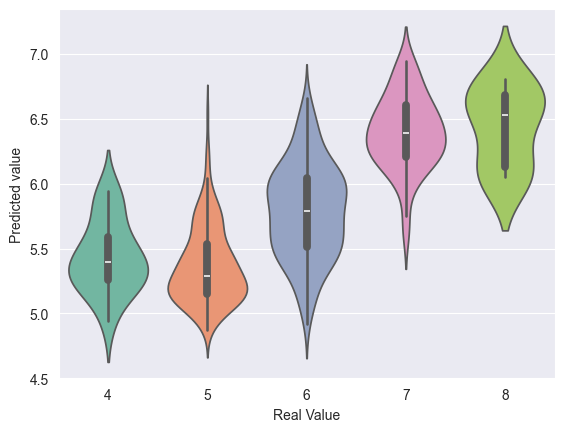

In [632]:
rf_df= pd.DataFrame({
    "Real Value": y_test,
    "Predicted value": y_pred
})
sn.violinplot(x="Real Value", y="Predicted value", data=rf_df, hue="Real Value", palette="Set2", legend=False)


# Wyniki

In [633]:
results

,Model,MAE,RMSE,R2
0,Linear Regression,0.50,0.40,0.37
1,KNN,0.45,0.63,0.39
2,Decision Tree,0.47,0.66,0.31
3,Decision tree - full set,0.53,0.40,0.33
4,Random Forest,0.45,0.40,0.46


In [634]:
best_mae = results["MAE"].min()
best_rmse = results["RMSE"].min()
best_r2 = results["R2"].max()

colors_mae = [
    "tab:orange" if v == best_mae else "tab:blue"
    for v in results["MAE"]
]

colors_rmse = [
    "tab:orange" if v == best_rmse else "tab:blue"
    for v in results["RMSE"]
]

colors_r2 = [
    "tab:orange" if v == best_r2 else "tab:blue"
    for v in results["R2"]
]



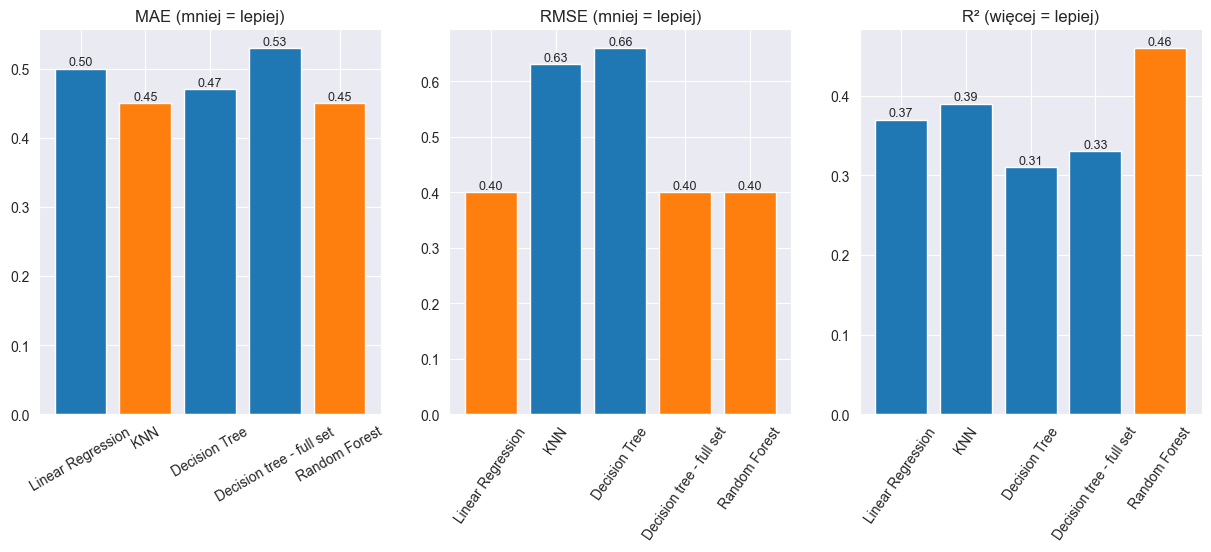

In [635]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))



axes[0].bar(results["Model"], results["MAE"], color=colors_mae)
axes[0].set_title("MAE (mniej = lepiej)")
axes[0].tick_params(axis='x', rotation=30)




axes[1].bar(results["Model"], results["RMSE"],color=colors_rmse)
axes[1].set_title("RMSE (mniej = lepiej)")
axes[1].tick_params(axis='x', rotation=55)

axes[2].bar(results["Model"], results["R2"], color=colors_r2)
axes[2].set_title("R² (więcej = lepiej)")
axes[2].tick_params(axis='x', rotation=55)

for k,model in enumerate(results):
    if k==0:
        continue
    for i, v in enumerate(results[model]):
        axes[k-1].text(i, v, f"{v:.2f}", ha="center", va="bottom", fontsize=9)


plt.show()
